In [12]:
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input

from keras.datasets import mnist, cifar10

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 500
corruption_level = 0.3

# Simple AE on MNIST

## Load & prep data

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
# Add random noise
x_train_noisy = x_train + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


## Build the model

In [7]:
# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_4 (Dense)              (None, 784)               392784    
Total params: 785,284
Trainable params: 785,284
Non-trainable params: 0
_________________________________________________________________


## Train model

In [9]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, shuffle=True, verbose=1, validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
  640/60000 [..............................] - ETA: 17s - loss: 0.2282

/Users/jeremyvanvalkenburg/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


60000/60000 [==============================] - 12s 200us/step - loss: 0.2041 - val_loss: 0.1848
Epoch 2/100
60000/60000 [==============================] - 11s 188us/step - loss: 0.1746 - val_loss: 0.1634
Epoch 3/100
60000/60000 [==============================] - 11s 187us/step - loss: 0.1573 - val_loss: 0.1493
Epoch 4/100
60000/60000 [==============================] - 11s 183us/step - loss: 0.1451 - val_loss: 0.1389
Epoch 5/100
60000/60000 [==============================] - 12s 199us/step - loss: 0.1362 - val_loss: 0.1311
Epoch 6/100
60000/60000 [==============================] - 12s 202us/step - loss: 0.1294 - val_loss: 0.1251
Epoch 7/100
60000/60000 [==============================] - 12s 207us/step - loss: 0.1241 - val_loss: 0.1204
Epoch 8/100
60000/60000 [==============================] - 12s 195us/step - loss: 0.1198 - val_loss: 0.1165
Epoch 9/100
60000/60000 [==============================] - 11s 190us/step - loss: 0.1163 - val_loss: 0.1134
Epoch 10/100
60000/60000 [==============

60000/60000 [==============================] - 11s 182us/step - loss: 0.0855 - val_loss: 0.0854
Epoch 77/100
60000/60000 [==============================] - 10s 172us/step - loss: 0.0855 - val_loss: 0.0853
Epoch 78/100
60000/60000 [==============================] - 11s 183us/step - loss: 0.0854 - val_loss: 0.0852
Epoch 79/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.0853 - val_loss: 0.0852
Epoch 80/100
60000/60000 [==============================] - 10s 170us/step - loss: 0.0852 - val_loss: 0.0851
Epoch 81/100
60000/60000 [==============================] - 10s 173us/step - loss: 0.0852 - val_loss: 0.0851
Epoch 82/100
60000/60000 [==============================] - 10s 174us/step - loss: 0.0851 - val_loss: 0.0850
Epoch 83/100
60000/60000 [==============================] - 12s 193us/step - loss: 0.0850 - val_loss: 0.0849
Epoch 84/100
60000/60000 [==============================] - 11s 184us/step - loss: 0.0850 - val_loss: 0.0849
Epoch 85/100
60000/60000 [======

In [10]:
# evaluate the model
evaluation = autoencoder.evaluate(x_test_noisy, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

10000/10000 [==============================] - 1s 53us/step

Summary: Loss over the test dataset: 0.08


In [13]:
# decode test images 
decoded_imgs = autoencoder.predict(x_test_noisy)

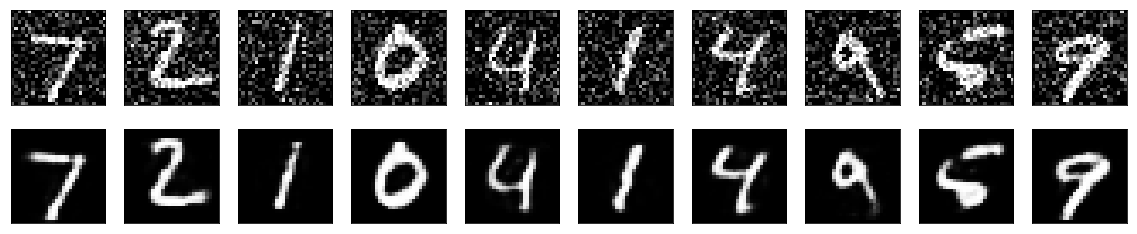

In [14]:
plt.figure(figsize=(20, 4))
for i in range(10):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# CNNAE on CIFAR10

In [25]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

## Load & Prep data

In [15]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize data
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

170508288/170498071 [==============================] - 610s 4us/step


In [23]:
corruption_level = 0.1
# add random noise
x_train_noisy = X_train + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


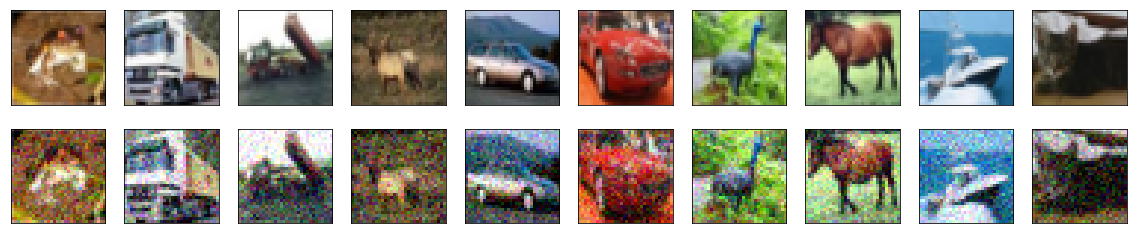

In [24]:
plt.figure(figsize=(20, 4))
for i in range(10):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_noisy[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [75]:
# convenience testing func
def test_autoencoder(autoencoder, X_test, X_test_noisy):
    decoded_imgs = autoencoder.predict(X_test_noisy)
    
    plt.figure(figsize=(12, 4))
    for i in range(10):
        # display original
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(X_test[i].reshape(32, 32, 3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display noise
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(x_test_noisy[i].reshape(32, 32, 3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(3, n, i + 1 + n * 2)
        plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Build model

In [76]:
# encoding
inputs = Input(shape=(32, 32, 3))
x = Conv2D(filters=64, kernel_size=5, activation='relu', padding='same')(inputs)
x = Conv2D(filters=64, kernel_size=5, activation='relu', padding='same')(x)
x = MaxPooling2D(padding='same')(x)
x = Conv2D(filters=32, kernel_size=4, activation='relu', padding='same')(x)
x = Conv2D(filters=32, kernel_size=4, activation='relu', padding='same')(x)
x = MaxPooling2D(padding='same')(x)
x = Conv2D(filters=16, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=16, kernel_size=3, activation='relu', padding='same')(x)
encoder = MaxPooling2D(padding='same')(x)

# decoding
x = Conv2D(filters=16, kernel_size=3, activation='relu', padding='same')(encoder)
x = Conv2D(filters=16, kernel_size=3, activation='relu', padding='same')(encoder)
x = UpSampling2D()(x)
x = Conv2D(filters=32, kernel_size=4, activation='relu', padding='same')(x)
x = Conv2D(filters=32, kernel_size=4, activation='relu', padding='same')(x)
x = UpSampling2D()(x)
x = Conv2D(filters=64, kernel_size=5, activation='relu', padding='same')(x)
x = Conv2D(filters=64, kernel_size=5, activation='relu', padding='same')(x)
x = UpSampling2D()(x)
decoder = Conv2D(filters=3, kernel_size=3, activation='sigmoid', padding='same')(x)

# autoencoder
autoencoder = Model(inputs, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [77]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 32, 32, 64)        4864      
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 16, 16, 32)        32800     
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 16, 16, 32)        16416     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 8, 8, 32)          0         
__________

## Train model

In [55]:
autoencoder.fit(x_train_noisy, X_train, epochs=1, batch_size=32, validation_data=(x_test_noisy, X_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 333s 7ms/step - loss: 0.5863 - val_loss: 0.5776
